## Point estimate

In [5]:
from scipy import stats
import numpy as np

stats.chi2.stats(df=55, moments="mvsk")

(array(55.0),
 array(110.0),
 array(0.3813850356982369),
 array(0.21818181818181817))

In [3]:
x = stats.chi2.rvs(size=10000, df=55)

print(np.mean(x))
print(np.var(x))
print(stats.skew(x))
print(stats.kurtosis(x))

55.0569621908
108.810194443
0.3960167684039374
0.40191762317821134


## Skewness / Kurtosis

Skewness 0.5163977794943222
Kurtosis 0.4


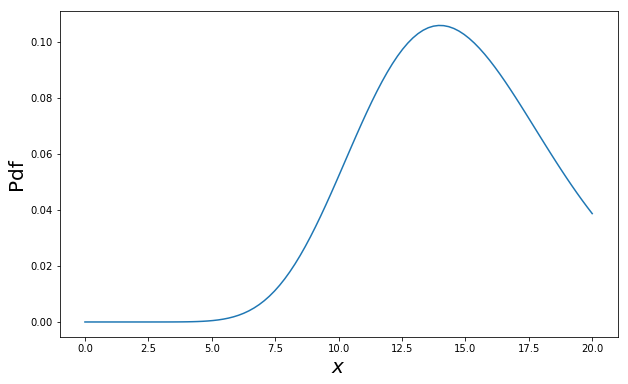

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

a = 15

x = np.linspace(0, 20, 100)
gamma_pdf = stats.gamma.pdf(x, a=a)

plt.figure(figsize=(10, 6))
plt.plot(x, gamma_pdf)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("Pdf", fontsize=20)
print("Skewness", stats.gamma.stats(a=a, moments="s"))

Kurtosis student t 0.006024096385542169
Kurtosis Normal 0.0


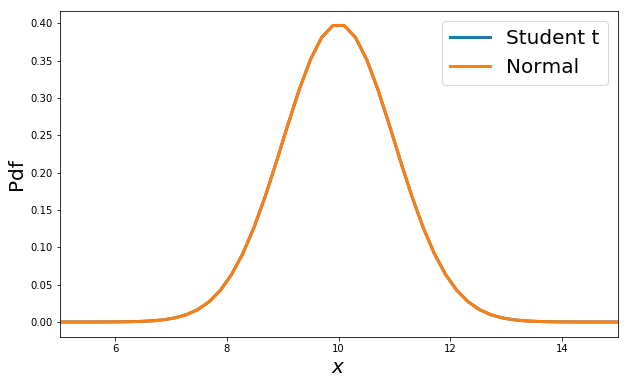

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

df = 1000

x = np.linspace(0, 20, 100)
student_t_pdf = stats.t.pdf(x, df=df, loc=10)

plt.figure(figsize=(10, 6))
plt.plot(x, student_t_pdf, lw=3, label="Student t")
plt.plot(x, stats.norm.pdf(x, loc=10), lw=3, label="Normal")
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("Pdf", fontsize=20)
plt.xlim(5, 15)
plt.legend(fontsize=20)
print("Kurtosis student t", stats.t.stats(df=df, loc=10, moments="k"))
print("Kurtosis Normal", stats.norm.stats(loc=10, moments="k"))

## Quantiles / Percentiles

In [42]:
import numpy as np

x = stats.norm.rvs(size=10000)

In [43]:
np.percentile(x, q=[2.5, 50, 97.5])

array([-1.94480645,  0.00695441,  1.98600107])

In [41]:
import pandas as pd

df = pd.DataFrame({"RNV":x})
df["RNV_cut"], bins = pd.qcut(df["RNV"], 10, retbins=True)
df["RNV_cut2"] = pd.cut(df["RNV"], bins)
df["RNV_cut"].value_counts()

(18.0, 20.0]     10
(16.0, 18.0]     10
(14.0, 16.0]     10
(12.0, 14.0]     10
(10.0, 12.0]     10
(8.0, 10.0]      10
(6.0, 8.0]       10
(4.0, 6.0]       10
(2.0, 4.0]       10
(-0.001, 2.0]    10
Name: RNV_cut, dtype: int64

## Dependency

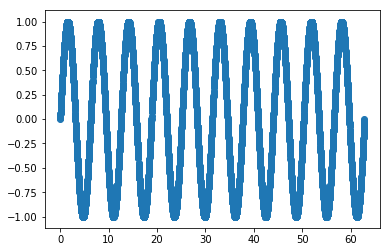

In [69]:
%matplotlib inline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 20*np.pi, size=10000)
y = np.sin(x)
plt.scatter(x, y)

In [71]:
stats.pearsonr(x, y)

(-0.078450515084412864, 3.9602466023919961e-15)

In [72]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.074627831222278312, pvalue=7.8822397507845581e-14)

In [73]:
metrics.normalized_mutual_info_score(x, y)

1.0

### Danger with Pearson

In [43]:
df = pd.DataFrame({"col1": stats.norm.rvs(size=100000),
                   "col2": stats.norm.rvs(size=100000)})
df

,col1,col2
0,-0.392950,-0.338620
1,-0.276814,0.107740
2,-0.361048,1.732419
3,0.061228,1.124577
4,0.171136,-1.092119
5,-0.513560,-2.227210
6,0.431896,-0.904883
7,-0.438310,1.569499
8,0.467262,0.866260
9,-0.872635,0.258192


In [44]:
df.rank()

,col1,col2
0,34688.0,36691.0
1,39102.0,54415.0
2,35856.0,95882.0
3,52346.0,86883.0
4,56667.0,13702.0
5,30429.0,1235.0
6,66536.0,18246.0
7,33046.0,94212.0
8,67865.0,80642.0
9,19222.0,60282.0


In [45]:
df.corr("spearman")

,col1,col2
col1,1.000000,0.003129
col2,0.003129,1.000000


In [88]:
df.corr("pearson")

,col1,col2
col1,1.000000,-0.001021
col2,-0.001021,1.000000


In [93]:
df.iloc[np.random.choice(range(df.shape[0]))] = 9999999
df

,col1,col2
0,0.697530,0.193857
1,-0.167633,0.072537
2,-3.090726,1.914630
3,1.373928,1.230417
4,-0.281496,-1.253994
5,-0.005833,0.713553
6,0.553194,0.246579
7,-0.527548,-1.879238
8,0.233131,-1.350456
9,-0.814216,1.038995


In [94]:
df.corr("pearson")

,col1,col2
col1,1.0,1.0
col2,1.0,1.0


In [95]:
df.corr("spearman")

,col1,col2
col1,1.000000,-0.000337
col2,-0.000337,1.000000


## Entropy

In [67]:
from sklearn.metrics.cluster import entropy
x = np.random.normal(size=100000)


entropy(x)

11.512925464970223

In [65]:
def ent(data):
    unique, counts = np.unique(data, return_counts=True)
    p_data= counts/len(data) # calculates the probabilities
    return stats.entropy(p_data)  # input probabilities to get the entropy 

ent(x)

11.512925464970223

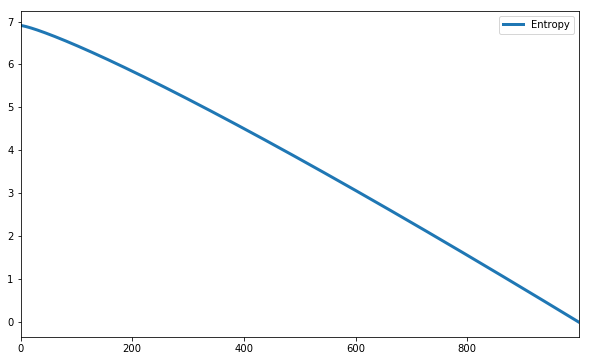

In [72]:
x = np.random.normal(size=1000)
entropy_df = pd.DataFrame(index=range(len(x)), columns=["Entropy"])

for i in range(len(x)):
    x[i] = 0
    entropy_df.loc[i, "Entropy"] = entropy(x)
    
entropy_df.plot(figsize=(10,6), lw=3) 